#TASK 1

In [ ]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Creating empty lists to collect the following

reviews  = []
stars = []
date = []
country = []

We are collecting customer ratings data from the airline quality website called Skytrax. We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 33
Error on page 34
Error on page 35


We check the length of the lists to verify similarity.

In [ ]:
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
stars = stars[:3500]

In [ ]:
len(stars)

3500

In [ ]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [ ]:
df.shape

(3500, 4)

Now that we have extracted data from the website, we must clean it so that it is ready to be analyzed. The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | When dropping off my luggag...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,28th July 2024,United Kingdom
1,✅ Trip Verified | If you can’t fly First Class...,1,19th July 2024,United States
2,Not Verified | Singapore to Heathrow. Busine...,1,16th July 2024,New Zealand
3,Not Verified | I reported my damaged/ruined ...,1,15th July 2024,United Kingdom
4,"Not Verified | On March 1st, I flew from Ber...",1,9th July 2024,Germany


In [ ]:
df.info

<bound method DataFrame.info of                                                 reviews  \
0     ✅ Trip Verified |  When dropping off my luggag...   
1     ✅ Trip Verified | If you can’t fly First Class...   
2     Not Verified |   Singapore to Heathrow. Busine...   
3     Not Verified |   I reported my damaged/ruined ...   
4     Not Verified |   On March 1st, I flew from Ber...   
...                                                 ...   
3495  B787. Just returned from a London - Toronto - ...   
3496  I travelled to Hong Kong with British Airways ...   
3497  BA1326 LHR-NCL. 10.10.14. I arrived on time at...   
3498  LHR-MXP-LHR. Check in/bag drop at T5 once agai...   
3499  Took 6 BA flights as part of a OneWorld RTW tr...   

                              stars               date         country  
0     \n\t\t\t\t\t\t\t\t\t\t\t\t\t5     28th July 2024  United Kingdom  
1                                 1     19th July 2024   United States  
2                                 1     16th July 2024     New Zealand  
3                                 1     15th July 2024  United Kingdom  
4                                 1      9th July 2024         Germany  
...                             ...                ...             ...  
3495                              9  12th October 2014  United Kingdom  
3496                              1  12th October 2014  United Kingdom  
3497                              4  12th October 2014  United Kingdom  
3498                              8  12th October 2014  United Kingdom  
3499                             10  12th October 2014       Australia  

[3500 rows x 4 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of                                                 reviews  \
0     ✅ Trip Verified |  When dropping off my luggag...   
1     ✅ Trip Verified | If you can’t fly First Class...   
2     Not Verified |   Singapore to Heathrow. Busine...   
3     Not Verified |   I reported my damaged/ruined ...   
4     Not Verified |   On March 1st, I flew from Ber...   
...                                                 ...   
3495  B787. Just returned from a London - Toronto - ...   
3496  I travelled to Hong Kong with British Airways ...   
3497  BA1326 LHR-NCL. 10.10.14. I arrived on time at...   
3498  LHR-MXP-LHR. Check in/bag drop at T5 once agai...   
3499  Took 6 BA flights as part of a OneWorld RTW tr...   

                              stars               date         country  
0     \n\t\t\t\t\t\t\t\t\t\t\t\t\t5     28th July 2024  United Kingdom  
1                                 1     19th July 2024   United States  
2                                 1     16th July 2024     New Zealand  
3                                 1     15th July 2024  United Kingdom  
4                                 1      9th July 2024         Germany  
...                             ...                ...             ...  
3495                              9  12th October 2014  United Kingdom  
3496                              1  12th October 2014  United Kingdom  
3497                              4  12th October 2014  United Kingdom  
3498                              8  12th October 2014  United Kingdom  
3499                             10  12th October 2014       Australia  

[3500 rows x 4 columns]>

In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1        True
2       False
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

Cleaning Reviews :
We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [ ]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

In [ ]:
!pip install nltk # make sure nltk is installed
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords') # downloads stopwords
nltk.download('wordnet') # downloads wordnet

lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | When dropping off my luggag...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,28th July 2024,United Kingdom,True,dropping luggage luggage drop toulouse airport...
1,✅ Trip Verified | If you can’t fly First Class...,1,19th July 2024,United States,True,fly first class fly british airway uncomfortab...
2,Not Verified | Singapore to Heathrow. Busine...,1,16th July 2024,New Zealand,False,verified singapore heathrow business class pre...
3,Not Verified | I reported my damaged/ruined ...,1,15th July 2024,United Kingdom,False,verified reported damaged ruined suitcase week...
4,"Not Verified | On March 1st, I flew from Ber...",1,9th July 2024,Germany,False,verified march st flew berlin paulo ba encount...


In [ ]:
#Cleaning/Fromat date
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
# convert the date to datetime format
df.date = pd.to_datetime(df.date, format='mixed') # use format='mixed' to infer the format for each element individually

In [ ]:
df.date.head()

0   2024-07-28
1   2024-07-19
2   2024-07-16
3   2024-07-15
4   2024-07-09
Name: date, dtype: datetime64[ns]

In [ ]:
#Cleaning ratings with stars
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '6', '3', '5', '9', '2', '8',
       '7', '4', '10', 'None'], dtype=object)

In [ ]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

stars
1       858
3       404
2       403
8       339
10      283
9       277
7       274
5       246
4       237
6       176
None      3
Name: count, dtype: int64

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)
#check the unique values again
df.stars.unique()

array(['5', '1', '6', '3', '9', '2', '8', '7', '4', '10'], dtype=object)

In [ ]:
#Check for null Values
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3497
Name: count, dtype: int64

In [ ]:
df.country.isnull().value_counts()

country
False    3497
Name: count, dtype: int64

In [ ]:

#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3497, 6)

In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | When dropping off my luggag...,5,2024-07-28,United Kingdom,True,dropping luggage luggage drop toulouse airport...
1,✅ Trip Verified | If you can’t fly First Class...,1,2024-07-19,United States,True,fly first class fly british airway uncomfortab...
2,Not Verified | Singapore to Heathrow. Busine...,1,2024-07-16,New Zealand,False,verified singapore heathrow business class pre...
3,Not Verified | I reported my damaged/ruined ...,1,2024-07-15,United Kingdom,False,verified reported damaged ruined suitcase week...
4,"Not Verified | On March 1st, I flew from Ber...",1,2024-07-09,Germany,False,verified march st flew berlin paulo ba encount...
...,...,...,...,...,...,...
3492,B787. Just returned from a London - Toronto - ...,9,2014-10-12,United Kingdom,False,b returned london toronto london flight ba app...
3493,I travelled to Hong Kong with British Airways ...,1,2014-10-12,United Kingdom,False,travelled hong kong british airway heathrow ou...
3494,BA1326 LHR-NCL. 10.10.14. I arrived on time at...,4,2014-10-12,United Kingdom,False,ba lhr ncl arrived time lhr brazil using diffe...
3495,LHR-MXP-LHR. Check in/bag drop at T5 once agai...,8,2014-10-12,United Kingdom,False,lhr mxp lhr check bag drop slow appears staff ...


In [ ]:
# let check the index are in order
df = df.reset_index(drop =True)

**Exploratory Data Analysis :**

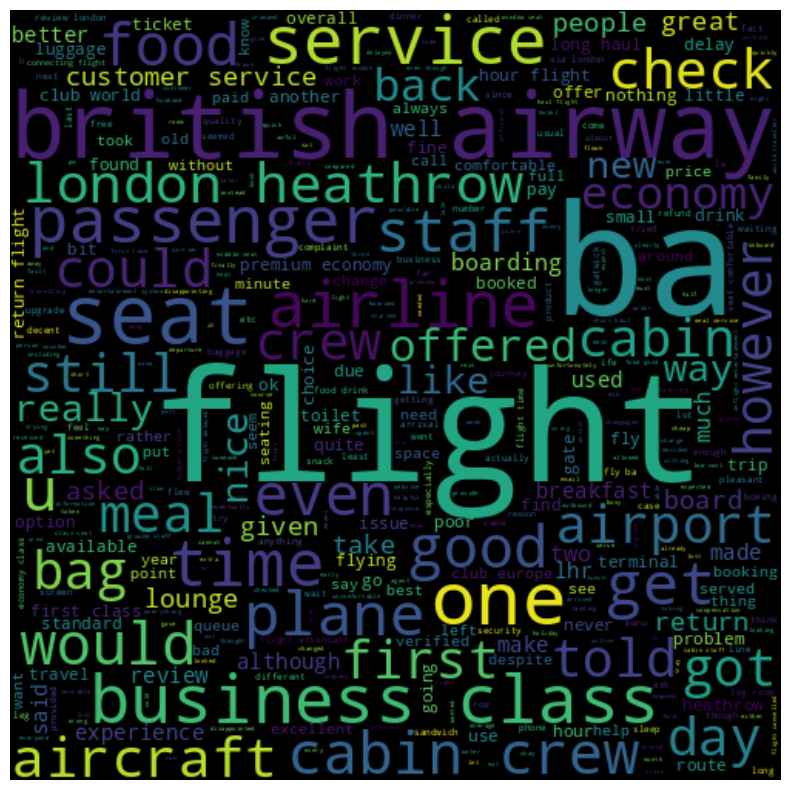

In [ ]:
import nltk
from nltk.corpus import stopwords
# starts with one review
reviews = " ".join(df.corpus)
plt.figure(figsize = (20,10))

stopwords = set(stopwords.words('english'))

# create the word cloud  image
wordcloud= WordCloud(height = 500 , width = 500 ,max_font_size=100 ,max_words=400 , stopwords= stopwords).generate(reviews)

plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis("off")
plt.show()

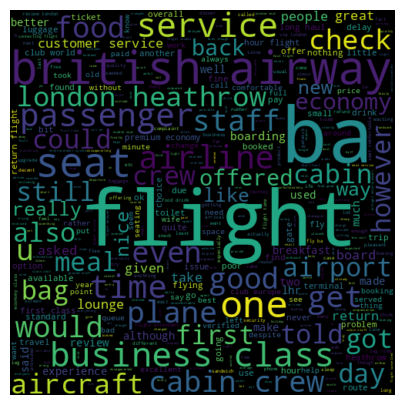

In [ ]:
import nltk
from nltk.corpus import  stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(15, 5))

stopwords = set(stopwords.words('english'))
stopwords.update(['ba' ,'british', 'airway' , 'flight' ,'plane' , 'london' ,'airline' 'alse'
                  'told' ,'passenger' , 'could' , 'heathrow'])

plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn .feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer

#split the text of all reviews into alist of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the  poitive and negative  sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['ba' , 'passenger', 'flight' , 'u' , 'london' ,'airway' , 'british airway'
                                     'plane' , 'heathrow' ,'reviews'])

**Word Frequency:**

<Axes: >

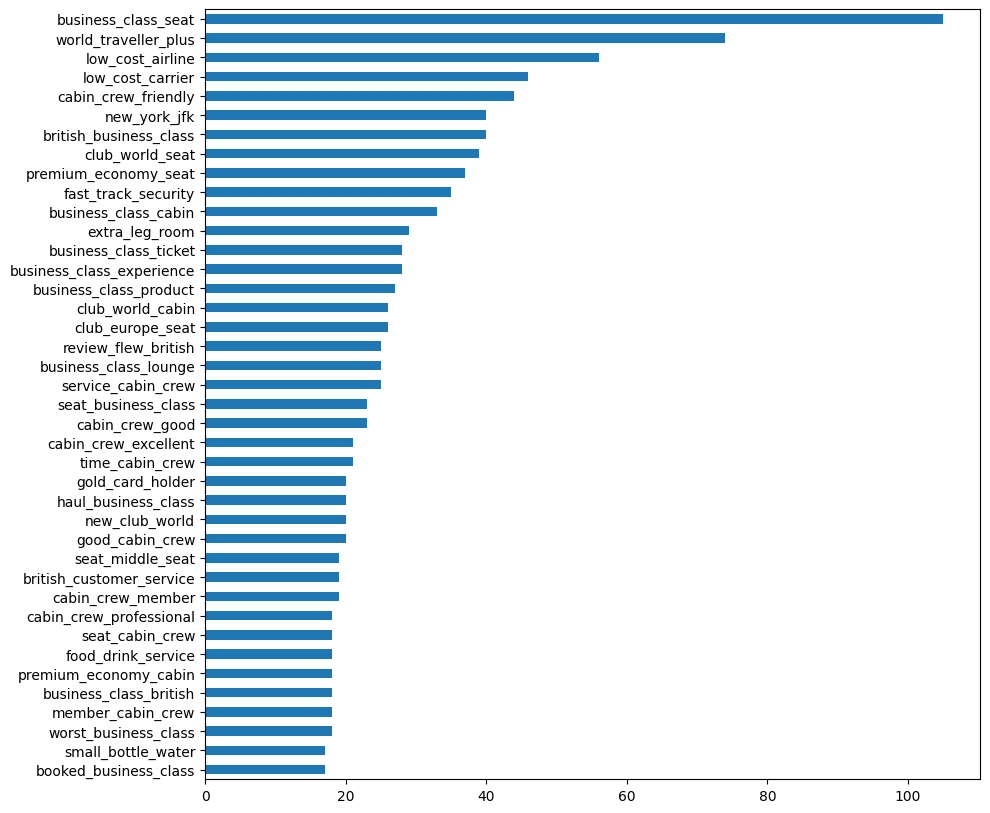

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist , bigrams

reviews = " ".join(df.corpus)

# split the text of all reviews into list of  words

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words , number_of_ngrams):
    from nltk import ngrams


    # Generat bigrams

    ngrams =ngrams(new_words , number_of_ngrams)

    # Creating FreqDist

    ngram_fd = FreqDist(ngrams).most_common(40)


    # Sort thr values by highest frequence
    ngrams_sorted = {k:v for k ,v  in sorted(ngram_fd , key= lambda item:item[1])}

    # Join bigram taken with '-' + maintain sorting
    ngram_joined = {'_'.join(k):v for k , v in sorted(ngram_fd , key= lambda item:item[1])}

    # Convert to pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax
get_freq_dist(new_words , 3)

Customers are consistently praising the cabin crew of British Airways with positive reviews like "good cabin crew," "polite cabin crew," "friendly and attentive cabin crew," and more. To gain a clearer understanding, we can categorize reviews based on ratings: 1-3 for bad reviews, 4-6 for average, and 7-10 for great experiences.

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 =df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

In [ ]:
print(f"ratings_1_3: {ratings_1_3}")
print(f"ratings_4_6: {ratings_4_6}") # removed extra indentation
print(f"ratings_7_10: {ratings_7_10}") # removed extra indentation

ratings_1_3: Empty DataFrame
Columns: [reviews, stars, date, country, verified, corpus]
Index: []
ratings_4_6: Empty DataFrame
Columns: [reviews, stars, date, country, verified, corpus]
Index: []
ratings_7_10: Empty DataFrame
Columns: [reviews, stars, date, country, verified, corpus]
Index: []


<Axes: >

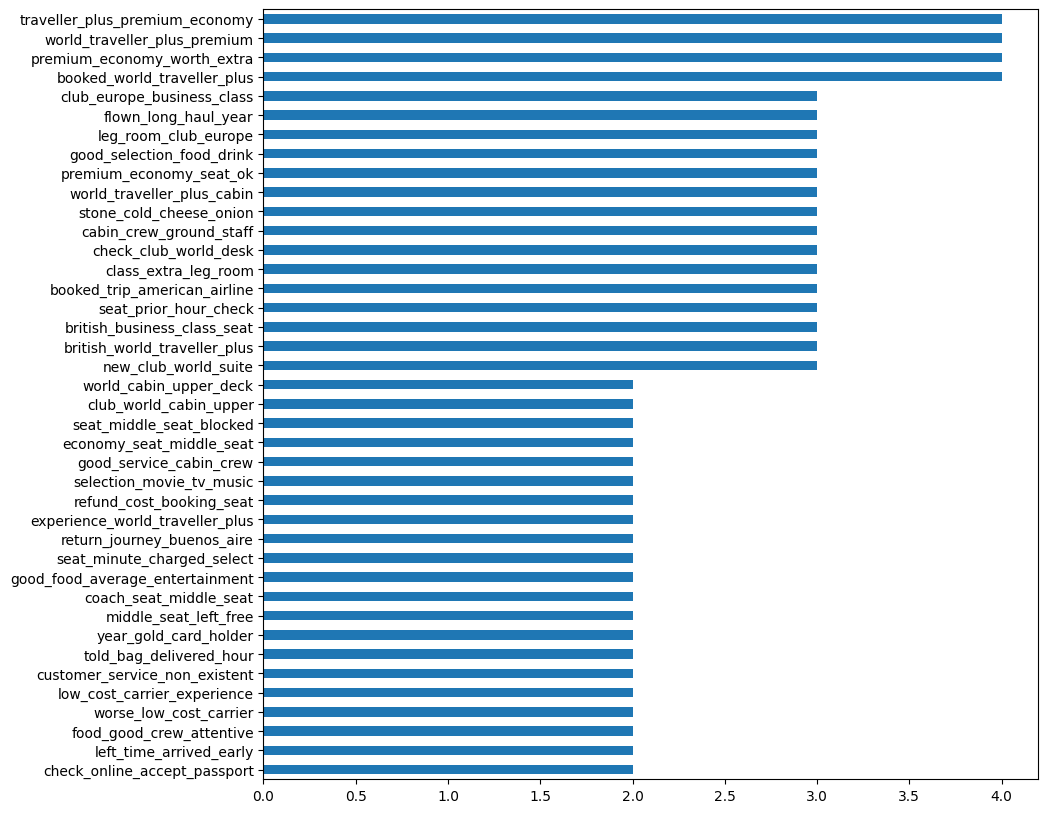

In [ ]:
ratings_1_3 = df[df['stars'].astype(int).between(1, 3)]
ratings_4_6 = df[df['stars'].astype(int).between(4, 6)]
ratings_7_10 = df[df['stars'].astype(int).between(7, 10)]

reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10= " ".join(ratings_7_10.corpus)


# split the text of all reviews into list a words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 =reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word.lower() not in stopwords] # convert words to lowercase for case-insensitive comparison
get_freq_dist(new_words_7_10 , 4)

<Axes: >

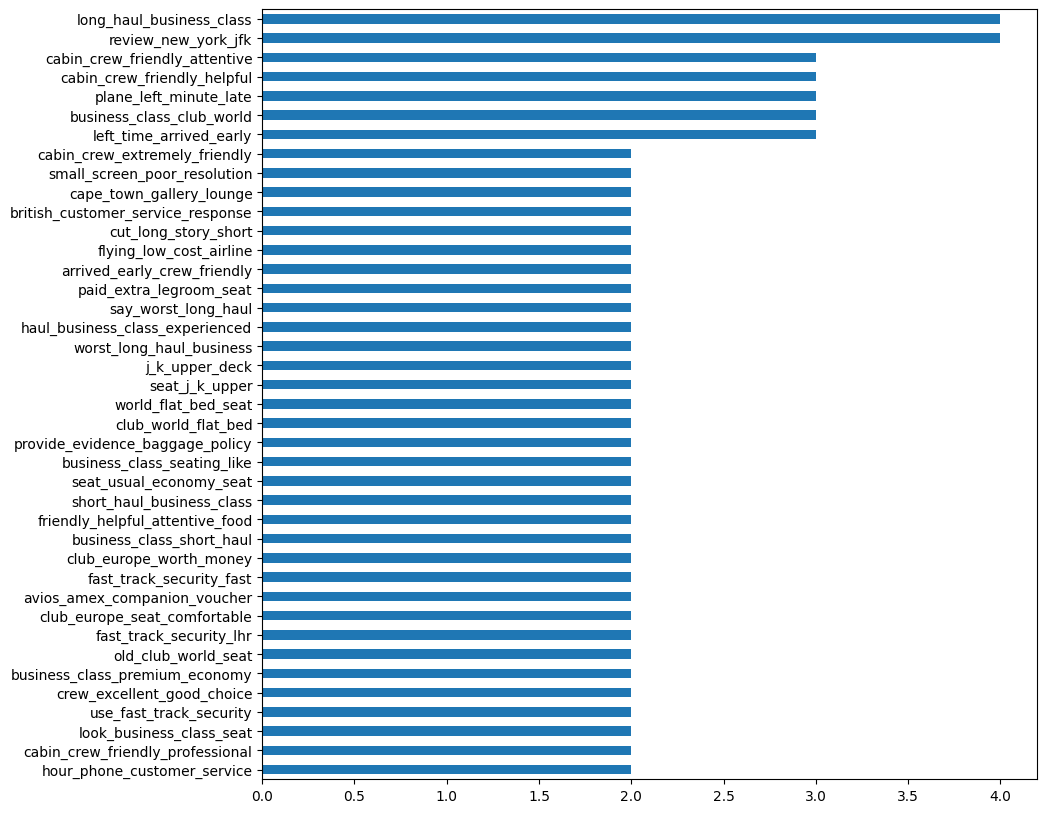

In [ ]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words_4_6 , 4)


<Axes: >

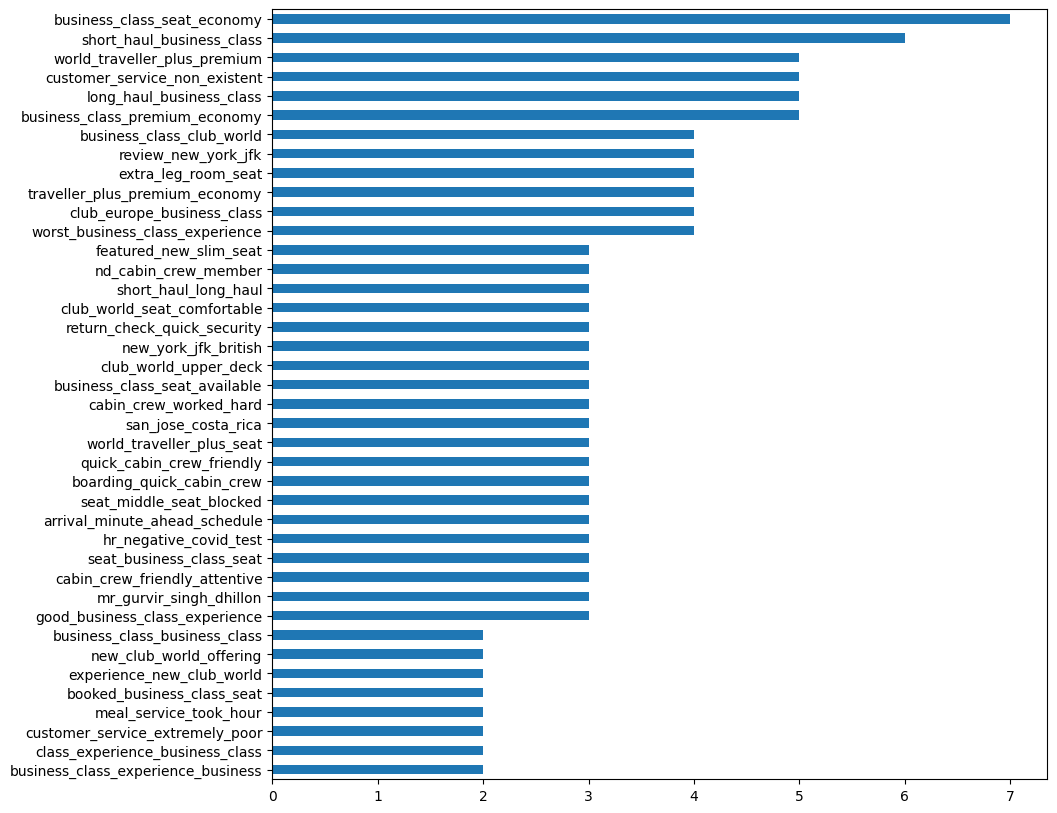

In [ ]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words_1_3 , 4)

**Sentiment Analysis using VADER :**



In [ ]:
!pip install vaderSentiment # install the missing module
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # import the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


,reviews,stars,date,country,verified,corpus,Sentiment,Analysis
0,✅ Trip Verified | When dropping off my luggag...,5,2024-07-28,United Kingdom,True,dropping luggage luggage drop toulouse airport...,-0.5892,Negative
1,✅ Trip Verified | If you can’t fly First Class...,1,2024-07-19,United States,True,fly first class fly british airway uncomfortab...,-0.9629,Negative
2,Not Verified | Singapore to Heathrow. Busine...,1,2024-07-16,New Zealand,False,verified singapore heathrow business class pre...,-0.2040,Negative
3,Not Verified | I reported my damaged/ruined ...,1,2024-07-15,United Kingdom,False,verified reported damaged ruined suitcase week...,-0.7147,Negative
4,"Not Verified | On March 1st, I flew from Ber...",1,2024-07-09,Germany,False,verified march st flew berlin paulo ba encount...,-0.9757,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    1671
Negative    1506
Neutral      320
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7bea9bb608e0>,
 [Text(0.0772196392852489, 1.1073107636561004, 'Positive'),
  Text(-0.38801131211288786, -1.0399746254945048, 'Negative'),
  Text(1.064447933921755, -0.31472304645466836, 'Neutral')],
 [Text(0.04243601798558723, 0.6085221313785777, '47.8%'),
  Text(-0.21323144179176717, -0.5715175869834666, '43.1%'),
  Text(0.584966882605649, -0.17295590841202496, '9.2%')])

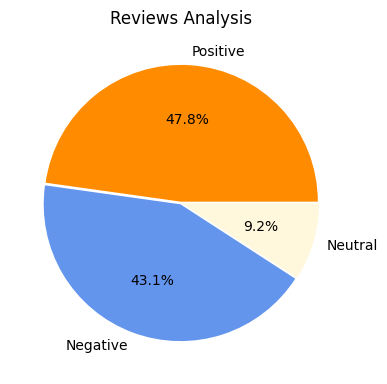

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.01 , 0.01, 0.01), autopct='%1.1f%%', colors=['#FF8C00','#6495ED','#FFF8DC'])

In [ ]:
df.to_csv("Analysis_BA_reviews.csv")

**WordCloud :**

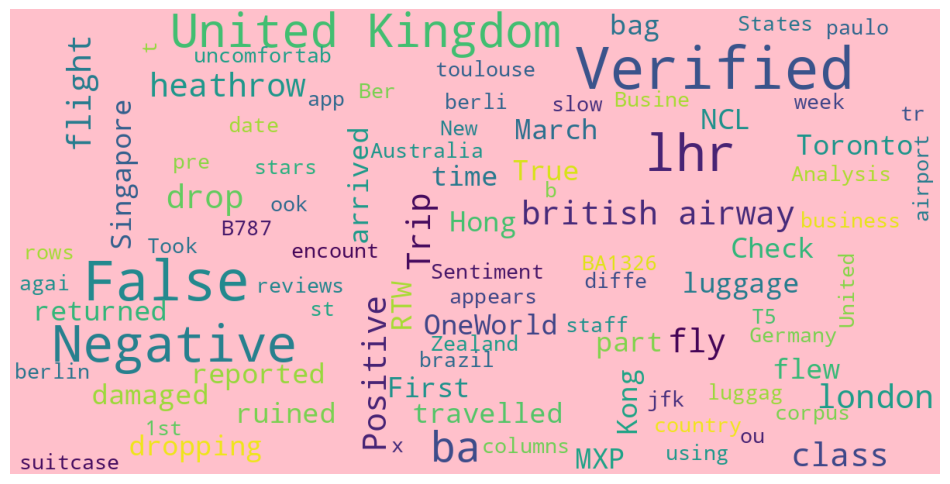

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='pink',
        stopwords=stopwords,
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df)